<a href="https://colab.research.google.com/github/Nawazwariya182/docs/blob/main/bitcoin_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement predicting the closing price of BTC using linear regression on the basis of-

*   opening price
*   daily high
*   daily low
*   volume











In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

reading the csv file and storing it in df variable

In [ ]:
df = pd.read_csv('BTC-USD.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       366 non-null    object 
 1   Open       366 non-null    float64
 2   High       366 non-null    float64
 3   Low        366 non-null    float64
 4   Close      366 non-null    float64
 5   Adj Close  366 non-null    float64
 6   Volume     366 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 20.1+ KB


Conveting the Date column datatype from object to datetime

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       366 non-null    datetime64[ns]
 1   Open       366 non-null    float64       
 2   High       366 non-null    float64       
 3   Low        366 non-null    float64       
 4   Close      366 non-null    float64       
 5   Adj Close  366 non-null    float64       
 6   Volume     366 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 20.1 KB


scatter graph for date and high

Creating a graph on the date and high

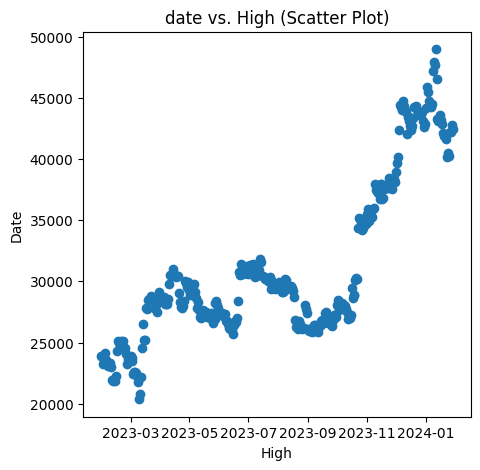

In [ ]:
plt.figure(figsize=(5, 5))
plt.scatter(df['Date'], df['High'])
plt.ylabel('Date')
plt.xlabel('High')
plt.title("date vs. High (Scatter Plot)")
plt.show()

scatter graph for date and low

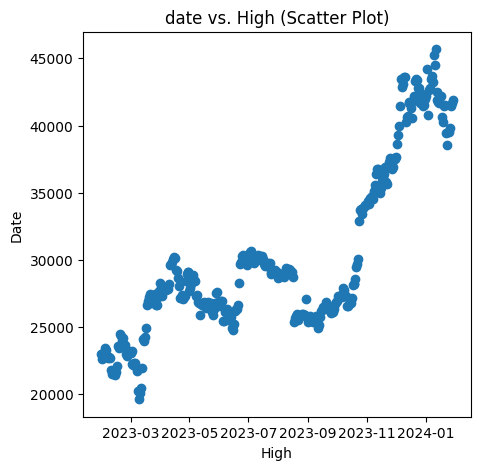

In [ ]:
plt.figure(figsize=(5, 5))
plt.scatter(df['Date'], df['Low'])
plt.ylabel('Date')
plt.xlabel('low')
plt.title("date vs. low (Scatter Plot)")
plt.show()

plot for date With High and Low

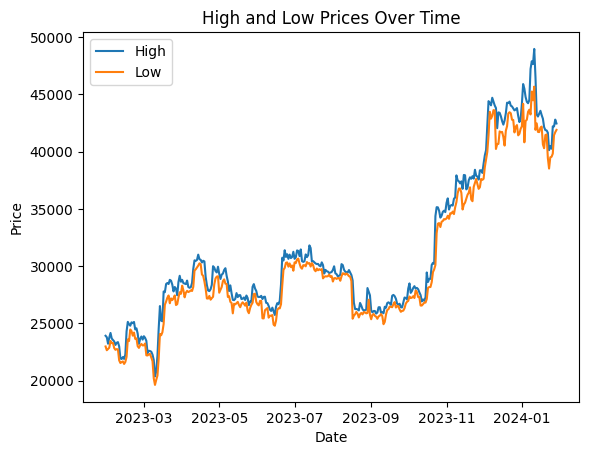

In [ ]:
plt.plot(df['Date'], df['High'], label='High')
plt.plot(df['Date'], df['Low'], label='Low')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('High and Low Prices Over Time')
plt.legend()
plt.show()

Heatmap of full BTC-USD.csv file

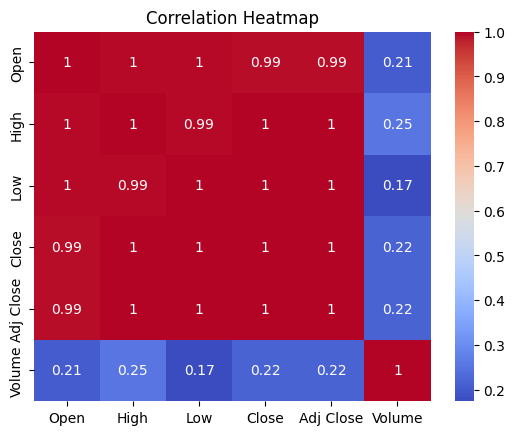

In [ ]:
numerical_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
corr_matrix = df[numerical_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Pie chart for volume distribution by day of the week

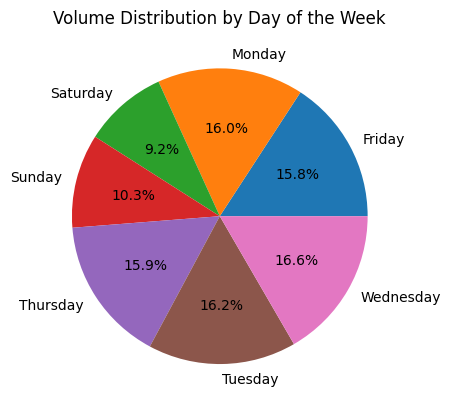

In [ ]:
df['DayOfWeek'] = df['Date'].dt.day_name()

volume_by_day = df.groupby('DayOfWeek')['Volume'].sum()

plt.pie(volume_by_day, labels=volume_by_day.index, autopct='%1.1f%%')
plt.title('Volume Distribution by Day of the Week')
plt.show()

plot of the BTC closing over time

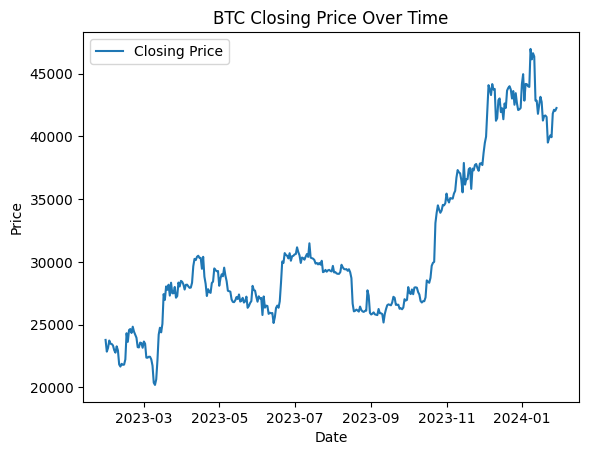

In [ ]:
plt.plot(df['Date'], df['Close'], label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('BTC Closing Price Over Time')
plt.legend()
plt.show()

plot of daily price fluctuation

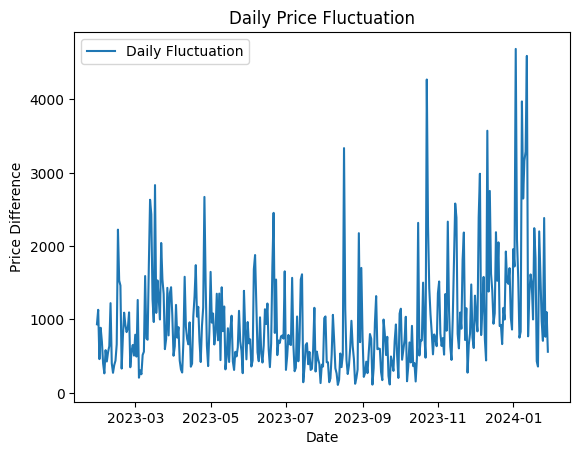

In [ ]:
plt.plot(df['Date'], df['High'] - df['Low'], label='Daily Fluctuation')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.title('Daily Price Fluctuation')
plt.legend()
plt.show()

plot of the trading volume over time

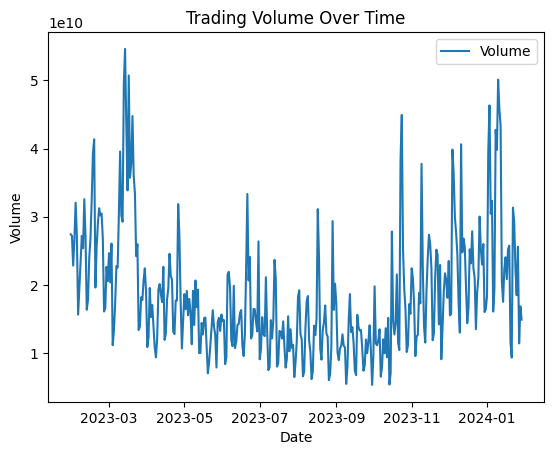

In [ ]:
plt.plot(df['Date'], df['Volume'], label='Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Trading Volume Over Time')
plt.legend()
plt.show()

bar graph of distribution of closing price

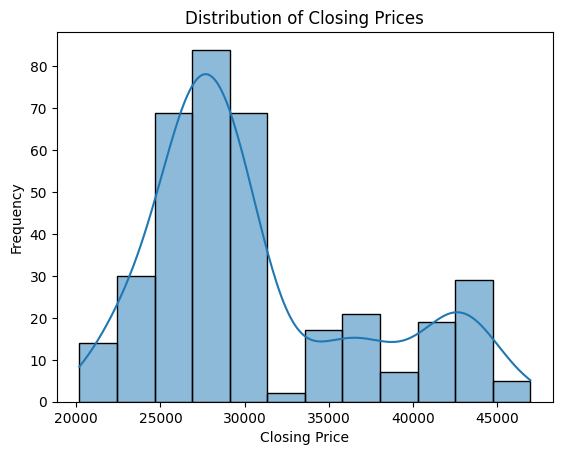

In [ ]:
sns.histplot(df['Close'], kde=True)
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.title('Distribution of Closing Prices')
plt.show()

scatter graph of closing price vs volume

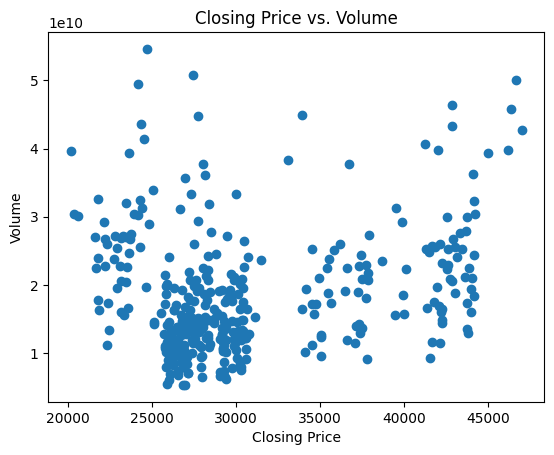

In [ ]:
plt.scatter(df['Close'], df['Volume'])
plt.xlabel('Closing Price')
plt.ylabel('Volume')
plt.title('Closing Price vs. Volume')
plt.show()

In [ ]:
df1 = pd.read_csv('BTC-USD (2).csv')

In [ ]:
data = df1.dropna()

In [ ]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
DayOfWeek    0
dtype: int64

In [ ]:
x = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
x_train.head()

,Open,High,Low,Volume
844,908.174988,942.723999,887.249023,158715008
1537,4200.733398,4301.519531,4110.978516,5262697895
1151,6618.609863,6873.149902,6204.220215,4908680192
1725,8036.774902,8076.891113,7837.610840,16522722810
3280,25895.210938,25978.130859,25640.261719,7899553047


In [ ]:
x_test.head()

,Open,High,Low,Volume
457,455.846985,465.177002,454.940002,60220100
1565,3822.384766,3901.908936,3797.219238,4770578575
351,229.324005,229.604996,226.667007,17482000
1665,5289.917969,5289.917969,5167.418945,14722104361
1847,8246.849609,8332.714844,8185.763184,15592264032


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([  460.60690502,  3862.52836917,   225.551735  , ...,
         312.51082622, 15932.65138634,  4295.2879995 ])

In [ ]:
r_sqaured = model.score(x_test, y_test)
print('coefficient of determination:', r_sqaured*100)

coefficient of determination: 99.96471355586462


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 122540.19836731051
Root Mean Squared Error: 350.0574215286837
Mean Absolute Error: 166.424599582317


In [ ]:
w = model.coef_
w

array([-5.58465760e-01,  8.91405221e-01,  6.64021017e-01, -1.79795512e-10])

In [ ]:
b = model.intercept_
b

-1.558265746833058

In [ ]:
input = [1565,	3822.384766,	3901.908936,	3797.219238,	4770578575]

In [ ]:
def predict(w, b, x):
  result = w * x + b
  return result

In [1]:
predict(w, b, input[0])

NameError: name 'predict' is not defined